In [14]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [15]:
from typing import TypedDict

class Batsman(TypedDict):
    runs: int
    balls: int
    fours:int
    sixes:int

    strike_rate: float
    bpb:float
    boundary_percentage:float
    summary:str



In [16]:
def calculate_strike_rate(state:Batsman)->Batsman:

    sr=state['runs']/state['balls']*100

    return {'strike_rate':sr}

In [17]:
def calculate_bpb(state:Batsman)->Batsman:

    bpb = state['balls']/(state['fours']+state['sixes'])

    return {'bpb':bpb}

In [18]:
def calculate_boundary_percentage(state:Batsman)->Batsman:

    boundary_percentage = (state['fours']+state['sixes'])/state['balls']*100

    return {'boundary_percentage':boundary_percentage}

In [19]:
def summary(state:Batsman)->Batsman:

    summary = f"Batsman scored {state['runs']} runs in {state['balls']} balls with a strike rate of {state['strike_rate']}% and a boundary percentage of {state['boundary_percentage']}%"

    return {'summary':summary}

In [20]:
graph = StateGraph(Batsman)


graph.add_node("calculate_strike_rate",calculate_strike_rate)
graph.add_node("calculate_bpb",calculate_bpb)
graph.add_node("calculate_boundary_percentage",calculate_boundary_percentage)
graph.add_node("summary",summary)

graph.add_edge(START, "calculate_strike_rate")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_boundary_percentage")

graph.add_edge("calculate_strike_rate", "summary")
graph.add_edge("calculate_bpb", "summary")
graph.add_edge("calculate_boundary_percentage", "summary")
graph.add_edge("summary", END)

workfloew=graph.compile()

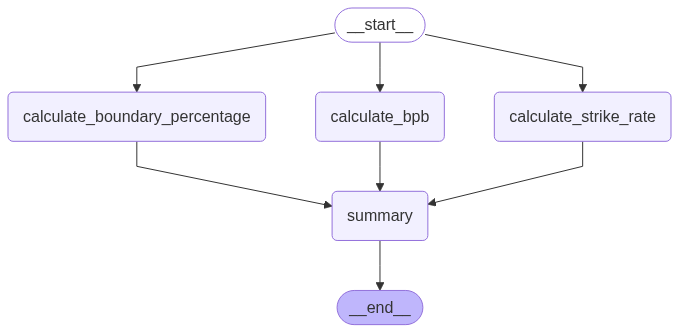

In [21]:
workfloew

In [22]:
intial_state = {
    'runs':100,
    'balls':50,
    'fours':6,
    'sixes':4,
}

workfloew.invoke(intial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'strike_rate': 200.0,
 'bpb': 5.0,
 'boundary_percentage': 20.0,
 'summary': 'Batsman scored 100 runs in 50 balls with a strike rate of 200.0% and a boundary percentage of 20.0%'}